In [1]:
import pandas as pd
import numpy as np
import os
import subprocess
pd.set_option('display.max_rows',500)

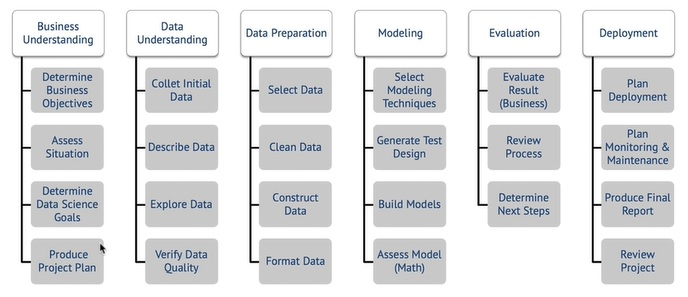

## Data Preparation
* Focus is to understand the final data structure.
* support each step by visual analytics.

### John Hopkins GITHUB csv data

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179477,179597,179624,179674,179716,179716,179771,179835,179835,180086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275732,275732,275732,275838,275864,275881,275939,275985,276012,276048
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265834,265841,265847,265851,265854,265855,265860,265862,265864,265870
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42572,42572,42572,42572,42572,42572,42572,42894,42894,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99433,99527,99527,99527


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/18/22', '5/19/22', '5/20/22', '5/21/22', '5/22/22', '5/23/22',
       '5/24/22', '5/25/22', '5/26/22', '5/27/22'],
      dtype='object', length=857)

In [5]:
time_idx = pd_raw.columns[4:]
print(type(time_idx))

<class 'pandas.core.indexes.base.Index'>


In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
len(pd_raw['Country/Region'].unique())

199

In [8]:
pd_raw[pd_raw['Country/Region'] == 'India'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
5/23/22    43140068
5/24/22    43142192
5/25/22    43144820
5/26/22    43147530
5/27/22    43150215
Length: 857, dtype: int64

In [9]:
country_list = ['Italy',
               'US',
               'India',
               'Brazil']


In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0))
df_plot

,date,Italy,US,India,Brazil
0,1/22/20,0,1,0,0
1,1/23/20,0,1,0,0
2,1/24/20,0,2,0,0
3,1/25/20,0,2,0,0
4,1/26/20,0,5,0,0
...,...,...,...,...,...
852,5/23/22,17257573,83390587,43140068,30803995
853,5/24/22,17288287,83501457,43142192,30836815
854,5/25/22,17312432,83718160,43144820,30851191
855,5/26/22,17333299,83837114,43147530,30880512


<AxesSubplot:xlabel='date'>

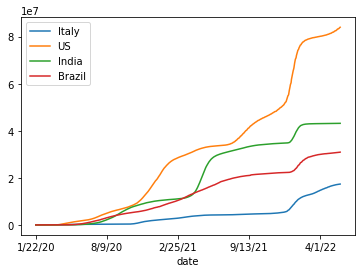

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

### Data Type Date

In [12]:
type(df_plot.date[0])

str

In [13]:
df_plot.head()

,date,Italy,US,India,Brazil
0,1/22/20,0,1,0,0
1,1/23/20,0,1,0,0
2,1/24/20,0,2,0,0
3,1/25/20,0,2,0,0
4,1/26/20,0,5,0,0


In [14]:
from datetime import datetime

In [15]:
df_plot.date[0]

'1/22/20'

In [16]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [17]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.date]
time_str = [datetime.strftime(each, "%Y-%m-%d") for each in time_idx]  #Convert back to date ISO norm


In [18]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df_plot.to_csv('../data/processed/COVID_small_flattable.csv',sep=';',index=False)

### Relational data model - defining a primary key

In [20]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179477,179597,179624,179674,179716,179716,179771,179835,179835,180086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275732,275732,275732,275838,275864,275881,275939,275985,276012,276048
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265834,265841,265847,265851,265854,265855,265860,265862,265864,265870
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42572,42572,42572,42572,42572,42572,42572,42894,42894,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99433,99527,99527,99527


In [21]:
 #First we rename the columns

pd_data_base = pd_raw.rename(columns = {'Country/Region':'country',
                                       'Province/State':'state'})
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179477,179597,179624,179674,179716,179716,179771,179835,179835,180086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275732,275732,275732,275838,275864,275881,275939,275985,276012,276048
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265834,265841,265847,265851,265854,265855,265860,265862,265864,265870
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42572,42572,42572,42572,42572,42572,42572,42894,42894,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99433,99527,99527,99527


In [22]:
#Now here we remove the lat and long of the country
pd_data_base = pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,179477,179597,179624,179674,179716,179716,179771,179835,179835,180086
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275732,275732,275732,275838,275864,275881,275939,275985,276012,276048
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265834,265841,265847,265851,265854,265855,265860,265862,265864,265870
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42572,42572,42572,42572,42572,42572,42572,42894,42894,42894
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99433,99527,99527,99527


In [23]:
#We can push state and country towards an index
test_pd = pd_data_base.set_index(['state','country']).T

In [24]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [25]:
test_pd1 = test_pd.stack(level=[0,1]).reset_index()

In [26]:
pd_relational_model = test_pd1.rename(columns = {'level_0':'date',
                                               0:'confirmed'})

In [27]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [28]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [29]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [30]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [31]:
#df_plot.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [32]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

# Group-by-apply

In [33]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv', sep =';', parse_dates = [0])
pd_JH_data = pd_JH_data.sort_values('date', ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,Zhejiang,Cyprus,0.0
2,2020-01-22,Zhejiang,Cuba,0.0
3,2020-01-22,Zhejiang,Croatia,0.0
4,2020-01-22,Zhejiang,Cote d'Ivoire,0.0


In [34]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [35]:
test_data.head()

,date,state,country,confirmed
28477,2020-03-21,Zhejiang,Germany,16662.0
28603,2020-03-21,Zhejiang,US,26025.0
28703,2020-03-21,NaN,Germany,16662.0
28827,2020-03-21,NaN,US,26025.0
28959,2020-03-22,Zhejiang,Germany,18610.0


In [36]:
test_data.groupby(['state','country']).agg(np.max)

date   confirmed
state    country                       
Zhejiang Germany 2022-05-27  26240639.0
         US      2022-05-27  83969313.0

In [ ]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function (data structure kept)

        parameters:
        ----------
        df_input : pandas.series
        column : str
        window : int
            used data points to calculate the filter result

        Returns:
        ----------
        df_result: pd.DataFrame
            the index of the df_input has to be preserved in result
    '''

    degree=1
    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[str(column+'_filtered')]=result
    return df_result

def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result




def calc_filtered_data(df_input,filter_on='confirmed'):
    '''  Calculate savgol filter and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    df_output=df_input.copy() # we need a copy here otherwise the filter_on column will be overwritten

    pd_filtered_result=df_output[['state','country',filter_on]].groupby(['state','country']).apply(savgol_filter)#.reset_index()

    #print('--+++ after group by apply')
    #print(pd_filtered_result[pd_filtered_result['country']=='Germany'].tail())

    #df_output=pd.merge(df_output,pd_filtered_result[['index',str(filter_on+'_filtered')]],on=['index'],how='left')
    df_output=pd.merge(df_output,pd_filtered_result[[str(filter_on+'_filtered')]],left_index=True,right_index=True,how='left')
    #print(df_output[df_output['country']=='Germany'].tail())
    return df_output.copy()





def calc_doubling_rate(df_input,filter_on='confirmed'):
    ''' Calculate approximated doubling rate and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'


    pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()

    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_2':'index'})

    #we do the merge on the index of our big table and on the index column after groupby
    df_output=pd.merge(df_input,pd_DR_result[['index',str(filter_on+'_DR')]],left_index=True,right_on=['index'],how='left')
    df_output=df_output.drop(columns=['index'])


    return df_output


if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))

    pd_JH_data=pd.read_csv('data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
    pd_JH_data=pd_JH_data.sort_values('date',ascending=True).copy()

    #test_structure=pd_JH_data[((pd_JH_data['country']=='US')|
    #                  (pd_JH_data['country']=='Germany'))]

    pd_result_larg=calc_filtered_data(pd_JH_data)
    pd_result_larg=calc_doubling_rate(pd_result_larg)
    pd_result_larg=calc_doubling_rate(pd_result_larg,'confirmed_filtered')


    mask=pd_result_larg['confirmed']>100
    pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)
    pd_result_larg.to_csv('data/processed/COVID_final_set.csv',sep=';',index=False)
    print(pd_result_larg[pd_result_larg['country']=='Germany'].tail())


In [38]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array['confirmed'])
    X = np.arange(len(y)).reshape(-1, 1)

    #assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

In [47]:
test_data.groupby(['state','country']).agg(np.max)

date   confirmed
state    country                       
Zhejiang Germany 2022-05-27  26240639.0
         US      2022-05-27  83969313.0

In [48]:
test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

state     country
Zhejiang  Germany    [-181.65647014622127]
          US          [-96.11888947777032]
dtype: object

In [50]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [51]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')


state     country        
Zhejiang  Germany  28477             NaN
                   28959             NaN
                   29441        6.427510
                   29922        5.190573
                   30403        6.129400
                                ...     
          US       410829    1315.464376
                   411323     761.395706
                   411794     510.034311
                   412274     498.637460
                   412754     667.653016
Name: confirmed, Length: 1596, dtype: float64

In [52]:
test_data

,date,state,country,confirmed
28477,2020-03-21,Zhejiang,Germany,16662.0
28603,2020-03-21,Zhejiang,US,26025.0
28703,2020-03-21,NaN,Germany,16662.0
28827,2020-03-21,NaN,US,26025.0
28959,2020-03-22,Zhejiang,Germany,18610.0
...,...,...,...,...
412501,2022-05-26,NaN,US,83837114.0
412630,2022-05-27,Zhejiang,Germany,26240639.0
412754,2022-05-27,Zhejiang,US,83969313.0
412854,2022-05-27,NaN,Germany,26240639.0


In [61]:
pd_DR_result = pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()


In [62]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,doubling_rate
0,Alberta,Canada,197,NaN
1,Alberta,Canada,679,NaN
2,Alberta,Canada,1161,NaN
3,Alberta,Canada,1643,NaN
4,Alberta,Canada,2125,NaN


In [65]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,329,2020-01-22,Zhejiang,Cyprus,0.0
2,328,2020-01-22,Zhejiang,Cuba,0.0
3,327,2020-01-22,Zhejiang,Croatia,0.0
4,326,2020-01-22,Zhejiang,Cote d'Ivoire,0.0


In [67]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN
1,329,2020-01-22,Zhejiang,Cyprus,0.0,NaN
2,328,2020-01-22,Zhejiang,Cuba,0.0,NaN
3,327,2020-01-22,Zhejiang,Croatia,0.0,NaN
4,326,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN


In [68]:
pd_result_larg[pd_result_larg['country']=='Germany']

,index,date,state,country,confirmed,doubling_rate
40,350,2020-01-22,Zhejiang,Germany,0.0,NaN
265,65,2020-01-22,NaN,Germany,0.0,NaN
520,832,2020-01-23,Zhejiang,Germany,0.0,NaN
746,547,2020-01-23,NaN,Germany,0.0,NaN
1002,1314,2020-01-24,Zhejiang,Germany,0.0,NaN
...,...,...,...,...,...,...
411893,411693,2022-05-25,NaN,Germany,26198811.0,NaN
412149,412460,2022-05-26,Zhejiang,Germany,26200663.0,1260.254269
412374,412175,2022-05-26,NaN,Germany,26200663.0,NaN
412630,412942,2022-05-27,Zhejiang,Germany,26240639.0,1253.388687


# Filtering the data with groupby apply

In [69]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [70]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [71]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN
1,329,2020-01-22,Zhejiang,Cyprus,0.0,NaN,NaN
2,328,2020-01-22,Zhejiang,Cuba,0.0,NaN,-1.0
3,327,2020-01-22,Zhejiang,Croatia,0.0,NaN,NaN
4,326,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,NaN


# Filtered doubling rate

In [72]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
244240,Zhejiang,Zimbabwe,410904,NaN
244241,Zhejiang,Zimbabwe,411264,NaN
244242,Zhejiang,Zimbabwe,411780,NaN
244243,Zhejiang,Zimbabwe,412228,NaN
244244,Zhejiang,Zimbabwe,413073,NaN


In [73]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,confirmed_filtered_DR
413069,412745,2022-05-27,NaN,Senegal,86101.0,NaN,10715284.8,NaN
413070,412744,2022-05-27,NaN,Saudi Arabia,765788.0,NaN,657573.0,NaN
413071,412743,2022-05-27,NaN,Sao Tome and Principe,5982.0,NaN,535.0,NaN
413072,412710,2022-05-27,NaN,Monaco,12124.0,NaN,11819.0,NaN
413073,413073,2022-05-27,Zhejiang,Zimbabwe,251959.0,688.402189,251939.0,NaN


In [74]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN) 

In [75]:
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,confirmed_filtered_DR
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,329,2020-01-22,Zhejiang,Cyprus,0.0,NaN,NaN,NaN
2,328,2020-01-22,Zhejiang,Cuba,0.0,NaN,-1.0,NaN
3,327,2020-01-22,Zhejiang,Croatia,0.0,NaN,NaN,NaN
4,326,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,NaN,NaN
